AmirHassan AmirMahani 96405011

> Fuzzy Programing Exercise 3982

#Packages Installing

In [1]:
# !pip install -U scikit-fuzzy
# !pip install numpy 

#define fuzzy system

C:\Users\hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


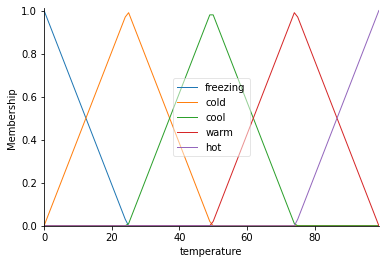

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature  = ctrl.Antecedent(np.arange(0,100,1),'temperature')
activity_level = ctrl.Antecedent(np.arange(0, 100, 1), 'activity_level')
heater  = ctrl.Consequent(np.arange(0, 101, 1), 'heater')

temperature.automf(5,variable_type='quality',names=['hot','warm','cool','cold','freezing'],invert=True)#determine number of Membership functions (3 or 5 or 7) , value type and it's linguistic variabels#should be reverce order to be low to high 
activity_level.automf(3,variable_type='quant',names=['busy','meduim','quiet'],invert=True)

heater['off']=fuzz.trimf(heater.universe, [0, 0, 25])
heater['low'] = fuzz.trimf(heater.universe, [0, 25, 50])#determine heater linguistic variabels
heater['medium'] = fuzz.trimf(heater.universe, [25, 50, 75])
heater['high'] = fuzz.trimf(heater.universe, [50, 75, 100])

temperature.view()

C:\Users\hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


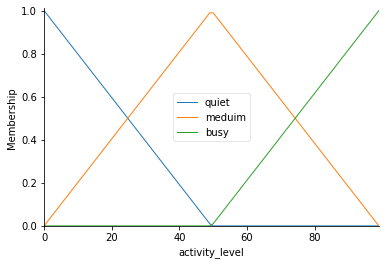

In [3]:
activity_level.view()

C:\Users\hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


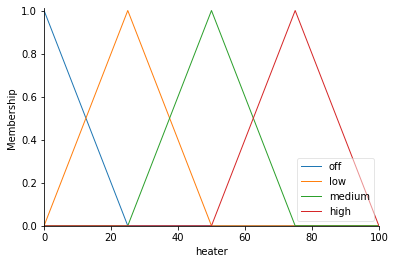

In [4]:
heater.view()

#determine fuzzy rules

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

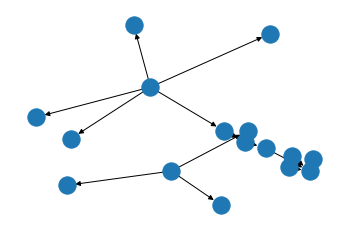

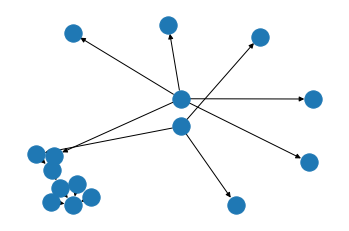

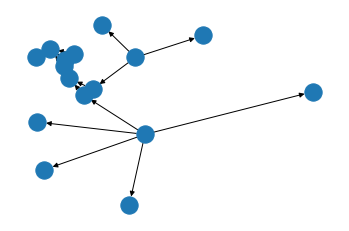

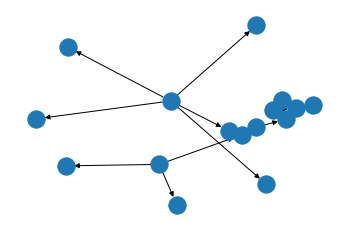

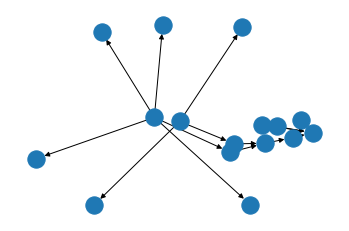

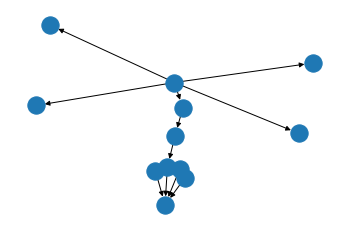

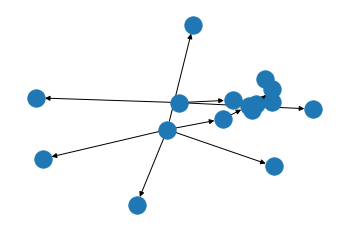

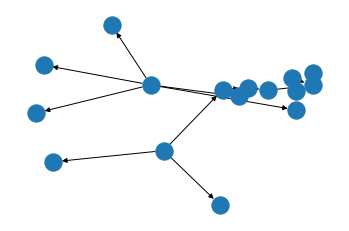

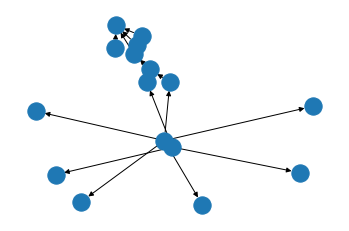

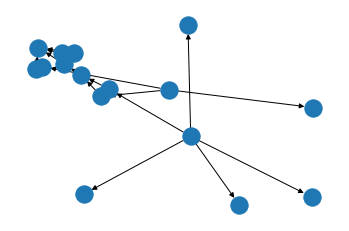

In [5]:
rule1 = ctrl.Rule(activity_level['quiet'] & temperature['warm'], heater['off'])
rule2 = ctrl.Rule(activity_level['busy'] & temperature['freezing'], heater['off'])
rule3 = ctrl.Rule(activity_level['meduim'] & temperature['cool'], heater['off'])
rule4 = ctrl.Rule(activity_level['quiet'] & temperature['cold'], heater['off'])
rule5 = ctrl.Rule(activity_level['busy'] & temperature['warm'], heater['off'])
rule6=ctrl.Rule(temperature['hot'],heater['off'])
rule7= ctrl.Rule(activity_level['busy'] & temperature['cold'], heater['off'])
rule8=ctrl.Rule(activity_level['meduim'] & temperature['cold'], heater['low'])
rule9 = ctrl.Rule(activity_level['quiet'] &temperature['freezing'], heater['high'])
rule10 = ctrl.Rule(activity_level['meduim'] &temperature['freezing'], heater['medium'])

heat_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,rule6,rule7,rule8,rule9,rule10])

heat = ctrl.ControlSystemSimulation(heat_ctrl)


rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()
rule10.view()

#example input



     heat is :9.499334102398167





C:\Users\hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


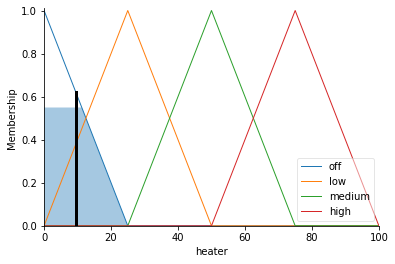

In [6]:
heat.input['temperature']= 63.1
heat.input['activity_level']=77.1

heat.compute()

print("\n\n     heat is :"+str(heat.output['heater'])+"\n\n\n")
heater.view(sim=heat)